---
# PHY426 Practical 5 / Assignment 2
---

This practical includes problems from Chapter 5 of Newman's book. 

This assignment will be due at 1:10pm on Thursday February 14th (just before the next practical).

Your solution to each question will be graded for correctness as well as for the readability of your code (including comments, appropriate labels on figures, etc). 20% of the grade will be based on comments/readability/graph labels. 

You can complete this assignment with a partner or individually. If you work with a partner, please provide their name here in the cell below:

Partner: Mohamed Salama, utorid: salamam5 

In [1]:
# Make sure to run this so you can see your plots in the notebook
%matplotlib inline

In [20]:
# Copied from Lecture 5

from pylab import *
def gaussxw(N):
    '''
    Return the x_k and w_k required for Gaussian Quadrature on an interval from -1 to 1
    '''

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2) 

    
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Calculate the sample points (roots of the Legendre polynomial) using Newton's method
    epsilon = 1e-15
    delta = 1.0
    
    
    while delta>epsilon:
        # Create 2 arrays of ones of length N
        p0 = ones(N,float) # This will be the (N-1)th legendre polynomial once the for loop ends
        
        # Makes a copy of x but leaves x in its original state so p1 so changing p1 doesn't affect p0
        p1 = copy(x) # This will be the Nth legendre polynomial once the for loop ends
        
        # Use recursive definition of legendre polynomials
        # to calculate the nth polynomial
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        
        # Use the recursive definition of the derivative of the legendre polynomials 
        # and the Nth and (N-1)th polynomials to calculate the derivative of the Nth polynomial:
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        
        # Finding the next root using Newton-Raphson iteration
        dx = p1/dp
        x -= dx
        
        # Defines the maximum change in the roots on current iteration
        delta = max(abs(dx))
        # NOTE: Once this change is less than threshold epsilon the roots have been approximated
        # within the specified epsilon, so iteration stops as per the loop condition

    # Calculate the weights using the specified formula 
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    '''
    Return the x'_k and w'_k required for Gaussian Quadrature after converting 
    from a range of -1 to 1 to a range of a to b
    '''
    x,w = gaussxw(N)
    
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w


def integrate(f,N,a,b):
    '''
    Performs integration of f from a to b using N points using gaussian quadrature 
    '''

    # Calculate the sample points and weights, then map them
    # to the required integration domain
    x,w = gaussxw(N)
    xp = 0.5*(b-a)*x + 0.5*(b+a)
    wp = 0.5*(b-a)*w

    # Perform the integration
    s = 0.0
    for k in range(N):
        s += wp[k]*f(xp[k])

    return s



---
# Exercise 1: A Diffracted Plane Wave
---


Suppose a plane wave of wavelength λ, such as light or a sound wave, is blocked by an object with a straight edge, represented by the solid line at the bottom of this figure:

![fig from Newman](fig.png)

The wave will be diffracted at the edge and the resulting intensity at the position $(x,z)$ marked by the dot is given by near-field diffraction theory to be

$I = \frac{I_0}{8} \Bigl( \bigl[ 2C(u) + 1 \bigr]^2 +
                        \bigl[ 2S(u) + 1 \bigr]^2 \Bigr),$

where $I_0$ is the intensity of the wave before diffraction and

$u = x \sqrt{2\over\lambda z}\,, \qquad$

$C(u) = \int_0^u \cos {1\over 2}\pi t^2 \>d t, \qquad  $

$S(u) = \int_0^u \sin {1\over 2}\pi t^2 \>d t.$

Write a program to calculate $I\over I_0$ and make a plot of it as a function of $x$ in the range $-5\,$m to $5\,$m for the case of a sound wave with wavelength $\lambda=1\,$m, measured $z=3\,$m past the straight edge. Calculate the integrals using Gaussian quadrature with $N=50$ points.  You should find significant variation in the intensity of the diffracted sound---enough that you could easily hear the effect if sound were
diffracted, say, at the edge of a tall building.


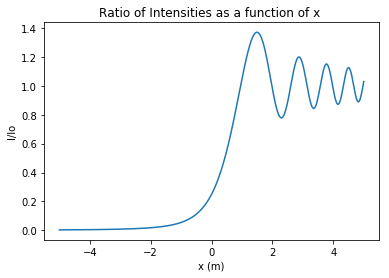

In [131]:
import numpy as np 
import matplotlib.pyplot as plt

# Constants
z = 3
wavelen = 1
N = 50

def I(x):
    '''
    Computes the value of the intensity ratio I/Io as a function of x
    '''
    
    # Calculates u (upper bound of C and S integrals)
    u = x*np.sqrt(2/(wavelen*z))
    
    def c(t):
        '''
        Computes the value of the inner function of C(u)
        '''
        return np.cos((1/2)*(np.pi)*t**2)
    
    def s(t):
        '''
        Computes the value of the inner function of S(u)
        '''
        return np.sin((1/2)*(np.pi)*t**2)
    
    # Computes the values of the integrals using Gaussian Quadrature (From Lecture 5) from 0 to u using N points
    C = integrate(c,N,0,u)
    S = integrate(s,N,0,u)
    
    return (1/8)*(((2*C+1)**2)+((2*S+1)**2))

# Stores values of I
Is = []

# Generates plot points for I as a function of x
for x in np.linspace(-5,5,1000):
    Is.append(I(x))
    
plt.plot(np.linspace(-5,5,1000), Is)
plt.xlabel('x (m)')
plt.ylabel('I/Io')
plt.title('Ratio of Intensities as a function of x ')
plt.show()

---
# Exercise 2: The Stefan-Boltzmann Constant
---

The Planck theory of thermal radiation tells us that in the (angular) frequency interval $\omega$ to $\omega+ d \omega$, a black body of unit area radiates electromagnetically an amount of thermal energy per
second equal to $I(\omega)\> d \omega$, where

  $I(\omega) = {\hbar\over4\pi^2c^2}\,{\omega^3\over( e^{\hbar\omega/k_BT}-1)}.$

Here $\hbar$ is Planck's constant over $2\pi$, $c$ is the speed of light, and $k_B$ is Boltzmann's constant.

(a) Show that the total energy per unit area radiated by a black body is

$W = {k_B^4 T^4\over4\pi^2c^2\hbar^3} \int_0^\infty {x^3\over e^x-1}\>d x.$

**Hint**: Refer to section 5.8 of Newman's book and use a change of variables. You can submit your answer on paper during the practical to Eugene, or you can upload your answer to the Jupyterhub as a file (e.g. scanning in your answer). 

(b) Write a program to evaluate the integral in this expression. 

(c) Even before Planck gave his theory of thermal radiation around the turn of the 20th century, it was known that the total energy $W$ given off by a black body per unit area per second followed Stefan's law: $W = \sigma T^4$, where $\sigma$ is the Stefan-Boltzmann constant. Use your value for the integral above to compute a value for the Stefan- Boltzmann constant (in SI units) to three significant figures. Check your result against the known value, which you can find in books or on-line.  You should get good agreement.


Part a)

$I(\omega) = {\hbar\over4\pi^2c^2}\,{\omega^3\over( e^{\hbar\omega/k_BT}-1)}$ is the intensity over an infinitesimal interval of angular frequency. Therefore, the total intensity (ie. total energy per unit time per unit area) is the integral over all frequencies:

$W = \int_0^\infty {\hbar\over4\pi^2c^2}\,{\omega^3\over( e^{\hbar\omega/k_BT}-1)} d\omega$

If we let $ x = \hbar\omega/k_BT $, then $ dx = \hbar d \omega/k_BT $

Therefore $ \omega = xk_BT/{\hbar} $, and $ d\omega = dxk_BT/{\hbar} $

Substituting the values for $\omega$ and $d \omega$ into the equation for W we get:

$W = {k_B^4 T^4\over4\pi^2c^2\hbar^3} \int_0^\infty {x^3\over e^x-1}\>d x$


In [42]:

import numpy as np

# Part b)
def I(z):
    '''
    The function being integrated in the expression for total energy per unit area radiated by a black body
    '''
    
    # The function being integrated from 0 to inf: (x**3)/((np.exp(x))-1)
    # Lets do a change of variables as per Newman chapter 5.8
    # If we let z = x/(1+x) (ie. x = z/(1-z)), then dx = dz/((1-z)^2)
    # Therefore, the equation becomes:
    I = (1/((1-z)**2)) * (((z/(1-z))**3)/((np.exp(z/(1-z)))-1))
    
    # and the bounds of integration become 0 to 1

    return I

# Calculate the integral in the expression for total energy per unit area radiated by a blackbody from 0 to 1 using 
# the change of variables:
integral = integrate(I, 30, 0, 1)
    
print("The integral in the expression for total energy per unit area radiated by a blackbody evaluates to:", integral)


# Part c)

# values for constants in the equation:
k = 1.38064852e-23
c = 299792458
ℏ = 6.62607015e-34/(2*np.pi)

# Calculating the Stefan-Boltzmann constant:
σ = ((k**4)/(4*(np.pi**2)*(c**2)*(ℏ**3)))*integral
print("The Stefan-Boltzmann constant was found to be:", np.round(σ,decimals=10), "W⋅m^(−2)⋅K^(−4), which is in agreement with the accepted value of 5.670367e-8 W⋅m^(−2)⋅K^(−4) (from wikipedia)")


The integral in the expression for total energy per unit area radiated by a blackbody evaluates to: 6.49394773640349
The Stefan-Boltzmann constant was found to be: 5.67e-08 W⋅m^(−2)⋅K^(−4), which is in agreement with the accepted value of 5.670367e-8 W⋅m^(−2)⋅K^(−4) (from wikipedia)


---
# Exercise 3: Diffraction Gratings
---

Light with wavelength $\lambda$ is incident on a diffraction grating of total width $w$, gets diffracted, is focused with a lens of focal length $f$, and falls on a screen:

![fig from Newman](FIG1.png)

Theory tells us that the intensity of the diffraction pattern on the screen, a distance $x$ from the central axis of the system, is given by
 
$I(x) = \biggl| \int_{-w/2}^{w/2} \sqrt{q(u)}\>
                e^{i 2\pi xu/\lambda f} \> d u \biggr|^2,$
 
where $q(u)$ is the intensity transmission function of the diffraction grating at a distance $u$ from the central axis, i.e., the fraction of the incident light that the grating lets through.

(a) Consider a grating with transmission function $q(u) = \sin^2 \alpha u$.  What is the separation of the "slits" in this grating, expressed in terms of  $\alpha$? [Write your answer in the markdown box below.]



The transmission of the grating is zero where there is no slit, and 1 at the centre of each slit. Therefore, the slit spacing is simply the period of the $sin^{2}(αu)$ function, which is π/α.

(b) Write a Python function `q(u)` that returns the transmission function $q(u) = \sin^2 \alpha u$ as above at position $u$ for a grating whose slits have separation $20\,\mu$m.

(c) Use your function in a program to calculate and graph the intensity of the diffraction pattern produced by such a grating having ten slits in total, if the incident light has wavelength $\lambda=500\,$nm.  Assume the lens has a focal length of 1 meter and the screen is $10$ cm wide. You can use whatever method you think appropriate for doing the integral. Once you've made your choice you'll also need to decide the number of sample points you'll use.  What criteria play into this decision?

**Hint**: Notice that the integrand in the equation for $I(x)$ is complex, so you
  will have to use complex variables in your program.  There is a version of the `math` package for use with
  complex variables called `cmath`.  In particular you may find the
  `exp` function from `cmath` useful because it can calculate the
  exponentials of complex arguments. 
  
Create a visualization of how the diffraction pattern would look on the screen using a density plot.  Your plot should look something like this: 

![fig from Newman](FIG2.png)

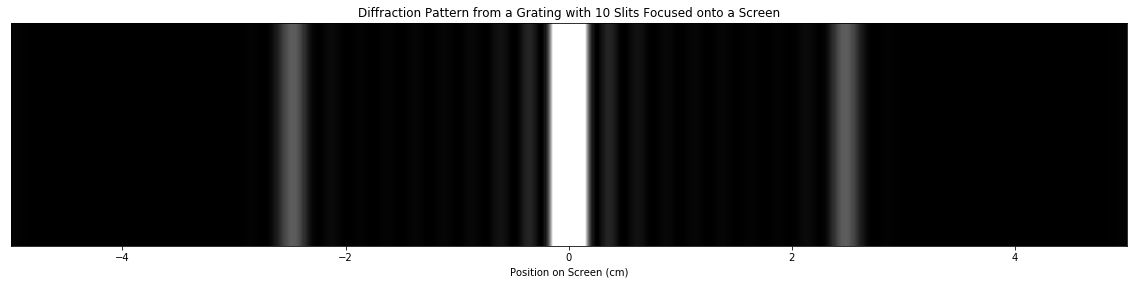

In [133]:
# part b)
import cmath

def q(u, s=20e-6):
    '''
    returns the transmission function  q(u)=(sinαu)^2
    at position u for a grating whose slits have a separation of s micrometres
    
    Default s value is 20 micrometres
    '''
    α = np.pi/s # as per part a)
    return np.sin(α*u)**2

def I(x, w, f, λ):
    '''
    Integrates over the diffraction grating to give the intensity of the diffraction pattern at position x on the screen,
    as per the equation in the question.
    Uses a grating width of w, a focal length of f, and a wavelength of λ. The integral is over u, which is the position on
    the grating.
    '''
    
    # The equation that is to be integrated with respect to u
    def interior(u):
        return np.sqrt(q(u))*cmath.exp(complex(0, 2*cmath.pi*x*u/(λ*f)))
    
    # The value of the integral, using gaussian quadrature with 50 points
    I = integrate(interior, 50, -w/2, w/2)
    
    return np.abs(I)**2

# dimensions of the setup, in metres:
λ = 500e-9 #wavelength
f = 1  #focal length
w = 200e-6  # 10 slits with a 20 um spacing, so width of grating is 200 um
xrange = np.linspace(-0.05, 0.05, 1000)  # Screen is 10 cm wide, so want points within 5 cm of the central axis in each direction

Intensities=[]
for x in xrange:
    Intensities.append(I(x, w, f, λ))


# Stacking array of intensities on top of itself to create visualization:
Intensities = np.tile(Intensities, (200,1))

# Density plot of intensities:
plt.figure(figsize=(20,10))
plt.imshow(Intensities, extent = [-5, 5, 0, 2], cmap="gray", vmax = 5e-9)
ax = plt.gca()
ax.get_yaxis().set_visible(False) # y axis is just for visualization so we remove the axis ticks
plt.title("Diffraction Pattern from a Grating with 10 Slits Focused onto a Screen")
plt.xlabel("Position on Screen (cm)")
plt.show()